In [11]:
import pandas as pd
data = pd.read_csv('/content/Historical data of Tanzania Tourism.csv')

In [16]:
#.Identify the columns containing missing values.
data.isnull().sum()

ID                          0
country                     0
age_group                   0
travel_with              1114
total_female                3
total_male                  5
purpose                     0
main_activity               0
info_source                 0
tour_arrangement            0
package_transport_int       0
package_accomodation        0
package_food                0
package_transport_tz        0
package_sightseeing         0
package_guided_tour         0
package_insurance           0
night_mainland              0
night_zanzibar              0
payment_mode                0
first_trip_tz               0
most_impressing           313
total_cost                  0
dtype: int64

In [6]:
#Apply MODE to handle the missing values('travel_with')
data['travel_with'] = data['travel_with'].fillna(data['travel_with'].mode()[0])


In [7]:
#Apply MODE to handle the missing values('most_impressing')
data['most_impressing'].fillna(data['most_impressing'].mode()[0], inplace = True)

In [8]:
#Apply MEAN to handle the missing values('total_female')
data['total_female'] = pd.to_numeric(data['total_female'], errors='coerce')
data['total_female'] = data['total_female'].fillna(data['total_female'].mean())


In [9]:
#Apply MEAN to handle the missing values('total_male')
data['total_male'] = pd.to_numeric(data['total_male'], errors='coerce')
data['total_male'] = data['total_male'].fillna(data['total_male'].mean())


In [15]:
#Duplicates
duplicates_data = data.duplicated().sum()
duplicates_data

0

In [10]:
data.isnull().sum().reset_index()

,index,0
0,ID,0
1,country,0
2,age_group,0
3,travel_with,0
4,total_female,0
5,total_male,0
6,purpose,0
7,main_activity,0
8,info_source,0
9,tour_arrangement,0


In [ ]:
#Calculate summary statistics for numerical columns (mean, median, mode, etc)
data.describe()

,total_female,total_male,night_mainland,night_zanzibar,total_cost
count,4809.000000,4809.000000,4809.000000,4809.000000,4.809000e+03
mean,0.926758,1.009575,8.488043,2.304429,8.114389e+06
std,1.287840,1.138273,10.427624,4.227080,1.222490e+07
min,0.000000,0.000000,0.000000,0.000000,4.900000e+04
25%,0.000000,1.000000,3.000000,0.000000,8.121750e+05
50%,1.000000,1.000000,6.000000,0.000000,3.397875e+06
75%,1.000000,1.000000,11.000000,4.000000,9.945000e+06
max,49.000000,44.000000,145.000000,61.000000,9.953288e+07


<Axes: >

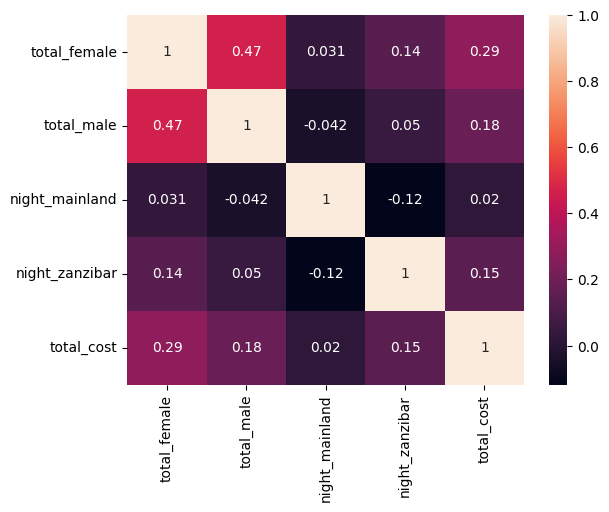

In [ ]:
#Find the correlation between columns and create a heatmap.
import seaborn as sns
data.select_dtypes('number').corr()
sns.heatmap(data.select_dtypes('number').corr(), annot = True)

In [12]:
#Find the 3 most frequent countries that visitors tend to come from.
top_countries = data['country'].value_counts().nlargest(3).reset_index()
top_countries

,country,count
0,UNITED STATES OF AMERICA,695
1,UNITED KINGDOM,533
2,ITALY,393


In [13]:
#Determine the most common purpose of the visit by 'age_group'.
most_common_purpose = data.groupby('age_group')['purpose'].agg(lambda x: x.mode().iloc[0]).reset_index()
most_common_purpose

,age_group,purpose
0,1-24,Leisure and Holidays
1,25-44,Leisure and Holidays
2,45-64,Leisure and Holidays
3,65+,Leisure and Holidays


In [ ]:
#Analyse the data distribution of 'total_cost' column with respect to Country
country_anal = data.groupby('country')['total_cost'].describe().reset_index()
country_anal


,country,count,mean,std,min,25%,50%,75%,max
0,ALGERIA,2.0,2.281549e+06,2.054568e+06,828750.0,1.555149e+06,2281548.75,3.007948e+06,3734347.5
1,ANGOLA,1.0,5.000000e+05,NaN,500000.0,5.000000e+05,500000.00,5.000000e+05,500000.0
2,ARGENTINA,1.0,1.044225e+07,NaN,10442250.0,1.044225e+07,10442250.00,1.044225e+07,10442250.0
3,AUSTRALIA,186.0,1.474802e+07,1.436988e+07,66300.0,3.750094e+06,9903562.50,2.065659e+07,66963000.0
4,AUSTRIA,18.0,7.640088e+06,5.999326e+06,1308683.0,3.586875e+06,6581057.00,8.991466e+06,23205000.0
...,...,...,...,...,...,...,...,...,...
100,UNITED STATES OF AMERICA,695.0,1.279256e+07,1.467559e+07,50000.0,2.593988e+06,7707375.00,1.740375e+07,86190000.0
101,URUGUAY,1.0,1.657500e+05,NaN,165750.0,1.657500e+05,165750.00,1.657500e+05,165750.0
102,YEMEN,2.0,1.928125e+05,7.893079e+04,137000.0,1.649062e+05,192812.50,2.207188e+05,248625.0
103,ZAMBIA,191.0,1.250904e+06,3.620663e+06,50000.0,2.025000e+05,497250.00,1.026394e+06,42100500.0


In [ ]:
#Analyse the data distribution of 'total_cost' column with respect to Age
age_anal = data.groupby('age_group')['total_cost'].describe().reset_index()
age_anal

,age_group,count,mean,std,min,25%,50%,75%,max
0,1-24,624.0,5.415205e+06,1.068684e+07,49725.0,569010.0,2602275.0,5690100.00,92645962.5
1,25-44,2487.0,6.026176e+06,9.991599e+06,49000.0,600000.0,2486250.0,7293000.00,99532875.0
2,45-64,1391.0,1.105093e+07,1.397950e+07,50000.0,1160250.0,5834400.0,15931933.25,95992659.0
3,65+,307.0,1.721195e+07,1.563210e+07,50000.0,4972500.0,12845625.0,25152562.50,77902500.0


In [ ]:
#Analyse the data distribution of 'total_cost' column with respect to Purpose
purpose_anal = data.groupby('purpose')['purpose'].describe().reset_index()
purpose_anal

,purpose,count,unique,top,freq
0,Business,671,1,Business,671
1,Leisure and Holidays,2840,1,Leisure and Holidays,2840
2,Meetings and Conference,312,1,Meetings and Conference,312
3,Other,128,1,Other,128
4,Scientific and Academic,87,1,Scientific and Academic,87
5,Visiting Friends and Relatives,633,1,Visiting Friends and Relatives,633
6,Volunteering,138,1,Volunteering,138


In [ ]:
!pip install pandas-profiling